# MPG regression problem

In [1]:
import sys
import os
import random
import csv
from pprint import pprint

from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join("..", ".."))
sys.path.append(module_path)

from perceptron import Model, cross_validation
from perceptron.data_utils import transpose


In [2]:
with open("auto-mpg.csv", "rt") as f:
    data = [
        [float(value) for value in features]
        for *features, _ in [
            line for line in csv.reader(f) if line and "?" not in line
        ]
    ]

targets, *features = transpose(data)
targets = [[value] for value in targets]
features = transpose(features)

# Single layer model

Training: 100% |████████████████████████████████████████| 20/20, mae=2.49


target=[19.1], prediction=[23.77259650501343]
target=[11.0], prediction=[10.31709610443265]
target=[26.0], prediction=[26.827349528850423]
target=[14.0], prediction=[13.112963119360757]
target=[13.0], prediction=[10.68849629248567]
target=[20.8], prediction=[23.769219666270693]
target=[25.4], prediction=[23.448592734206173]
target=[20.5], prediction=[21.718003880524986]
target=[15.5], prediction=[19.028112299865544]
target=[18.0], prediction=[17.462787645406213]


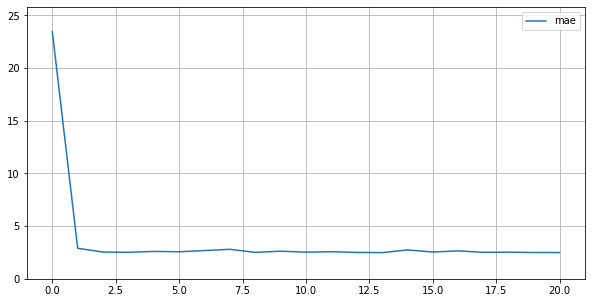

In [3]:
random.seed(0)

model = Model(
    inputs=7,
    layer_sizes=[1],
    activations="linear",
    init_method="he",
    normalization="zscore",
    optimizer="adam",
)

epochs = 20

history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    base_learning_rate=0.1,
    learning_rate_decay="linear",
    metrics=["mae"],
)

for index in random.choices(range(len(features)), k=10):
    target = targets[index]
    prediction = model.predict(features[index])
    print(f"{target=}, {prediction=}")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["mae"], label="mae")

ax.set_ylim(bottom=0, top=max(history["mae"]) * 1.1)
ax.grid()
ax.legend()
plt.show()


# Multi-layer model

Training: 100% |████████████████████████████████████████| 20/20, mae=1.9 


target=[34.1], prediction=[36.45182361398346]
target=[33.5], prediction=[28.870914824547615]
target=[34.0], prediction=[35.86604572184393]
target=[24.2], prediction=[26.890818764962724]
target=[17.5], prediction=[18.88023410002171]
target=[16.0], prediction=[13.409413387932604]
target=[11.0], prediction=[13.998717119010282]
target=[17.0], prediction=[14.499190893151438]
target=[30.0], prediction=[28.867385922589698]
target=[17.5], prediction=[16.270045308877272]


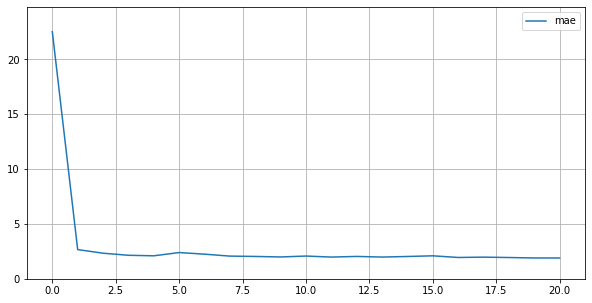

In [4]:
random.seed(0)

model = Model(
    inputs=7,
    layer_sizes=[5, 5, 1],
    activations=["leaky_relu"] * 2 + ["linear"],
    init_method="he",
    normalization="zscore",
    optimizer="adam",
)

epochs = 20

history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    base_learning_rate=0.01,
    learning_rate_decay="linear",
    metrics=["mae"],
)

for index in random.choices(range(len(features)), k=10):
    target = targets[index]
    prediction = model.predict(features[index])
    print(f"{target=}, {prediction=}")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["mae"], label="mae")

ax.set_ylim(bottom=0, top=max(history["mae"]) * 1.1)
ax.grid()
ax.legend()
plt.show()


# Cross validating multi-layer model

In [5]:
random.seed(0)

model_params = dict(
    inputs=7,
    layer_sizes=[5, 5, 1],
    activations=["leaky_relu"] * 2 + ["linear"],
    init_method="he",
    normalization="zscore",
    optimizer="adam",
)

epochs = 20

history = cross_validation(
    inputs=features,
    targets=targets,
    fold_count=3,
    epoch=epochs,
    batch_size=2,
    base_learning_rate=0.01,
    learning_rate_decay="linear",
    model_params=model_params,
    metrics=["mae"],
)


Training: 100% |████████████████████████████████████████| 20/20, mae=2.1, val_mae=2.22 
Training: 100% |████████████████████████████████████████| 20/20, mae=1.89, val_mae=2.13
Training: 100% |████████████████████████████████████████| 20/20, mae=2.1, val_mae=2.02 


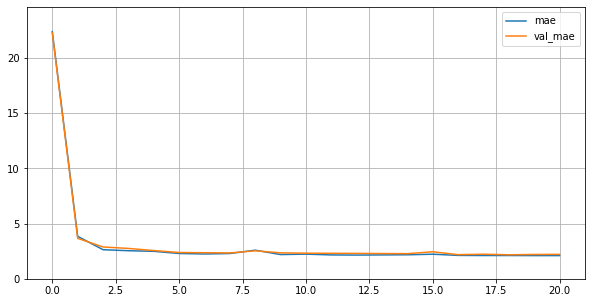

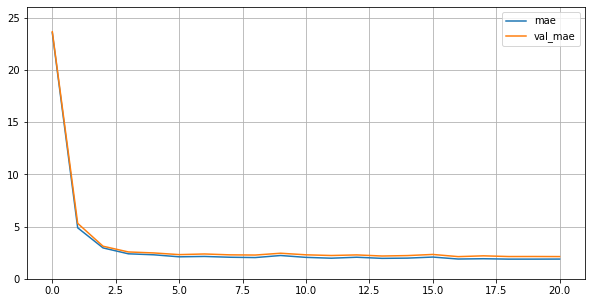

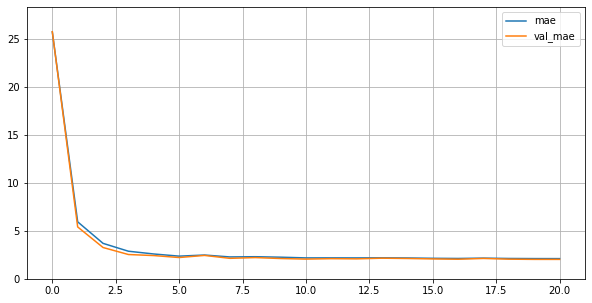

In [6]:
for run in history:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot()

    y_lim = 0.0
    for metric in ["mae", "val_mae"]:
        ax.plot(range(epochs + 1), run[metric], label=metric)
        y_lim = max(y_lim, max(run[metric]))

    ax.set_ylim(bottom=0, top=y_lim * 1.1)
    ax.grid()
    ax.legend()
    plt.show()
